# Week 11 Group Activity, Heather Leighton-Dick

## 1. Explore Google Trends. Find a topic of interest to you with more than a year of data, and export it.

### a. Import the data into a pandas dataframe.

I explored the trends of interest in the Roe vs. Wade Supreme Court case over the past five years.

https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=Roe%20v.%20Wade

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from arma_scipy import fit
import warnings
from pandas import Series

        Week  Roe v Wade Searches
0 2016-12-04                   64
1 2016-12-11                   31
2 2016-12-18                    9
3 2016-12-25                    0
4 2017-01-01                    4


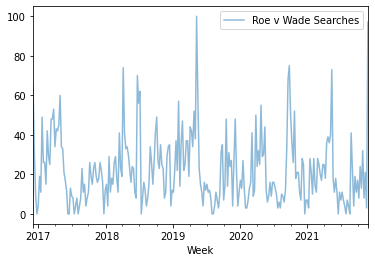

In [106]:
file_to_load = "multiTimeline RvW allcat.csv"
#Convert to dataframe and convert Week column to datetime format
#df = pd.read_csv('myfile.csv', parse_dates=['Date'], dayfirst=True)
RvW_df = pd.read_csv("multiTimeline RvW allcat.csv", parse_dates=['Week'])
RvW_df.set_index('Week')
RvW_df = RvW_df.dropna()
RvW_df.rename(columns={'Roe v. Wade: (US)': 'Roe v Wade Searches'}, inplace=True)
#change Week column to different format: df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
RvW_df['Week'] = pd.to_datetime(RvW_df['Week'])

print(RvW_df.head())
#RvW_df[["Roe v Wade Searches"].plot(title="Roe v Wade Searches (thousands)", x_compat=True, rot=45, figsize=(8, 6))

RvW_df.plot.line(x="Week", y="Roe v Wade Searches", alpha=0.5)
plt.show()

### b. Decide whether ARMA, ARIMA, or SARIMA makes the most sense for the dataset.

SARIMA doesn't make sense for this dataset, since it doesn't seem to rise and fall on a predictable time schedule. I think it might make the set easier to read if I use ARIMA, to make the series stationary and help clear up background "noise."

### c. Run your choice of analysis on the dataset.

p-value: 3.379407563020799e-10


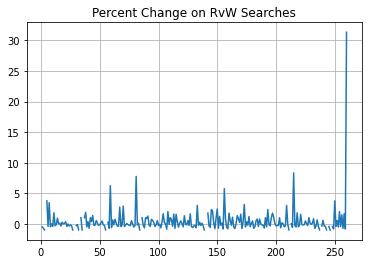

In [145]:
#Plot percent changes
RvW_df["PCT_Ch Roe v Wade Searches"]=RvW_df["Roe v Wade Searches"].pct_change()
RvW_df["PCT_Ch Roe v Wade Searches"].plot(title="Percent Change on RvW Searches", grid=True)

print("p-value:", adfuller(RvW_df["Roe v Wade Searches"].dropna())[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


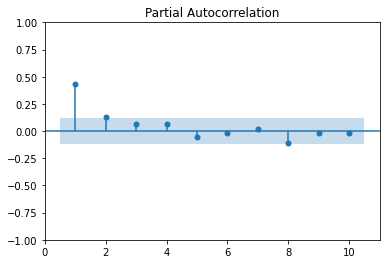

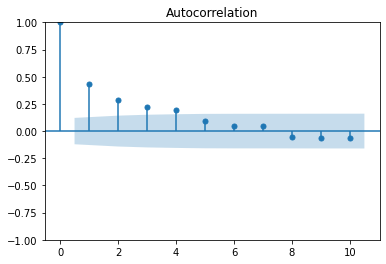

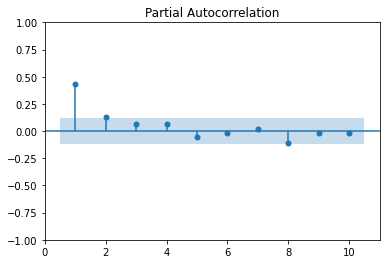

In [146]:
#The p-value is less than the significance level of 0.05, 
#so we reject the null hypothesis is rejected; the series is stationary (no differencing needed).

#Plot autocorrelation and partial autocorrelation
plot_acf(RvW_df[["Roe v Wade Searches"]], lags = 10, missing='drop')
plot_pacf(RvW_df[["Roe v Wade Searches"]], zero = False, lags = 10)

#not sure why the partial autocorrelation is printing twice

In [153]:
#create the model and generate summary
model = ARIMA(RvW_df["Roe v Wade Searches"], order=(1,1,2))
results_RvW_df = model.fit()
results_RvW_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Roe v Wade Searches   No. Observations:                  261
Model:                  ARIMA(1, 1, 2)   Log Likelihood               -1081.167
Date:                 Fri, 03 Dec 2021   AIC                           2170.334
Time:                         21:04:17   BIC                           2184.577
Sample:                              0   HQIC                          2176.060
                                 - 261                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7012      0.105      6.678      0.000       0.495       0.907
ma.L1         -1.2976      0.674     -1.925      0.054      -2.619       0.023
ma.L2          0.2978      0.260      1.144      0.253      -0.213       0.808
sigma2       235.8307    151.996      1.552      0.121     -62.076     533.738
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               378.05
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.53
Prob(H) (two-sided):                  0.41   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:title={'center':'Roe v Wade Searches 10 Day Forecast'}>

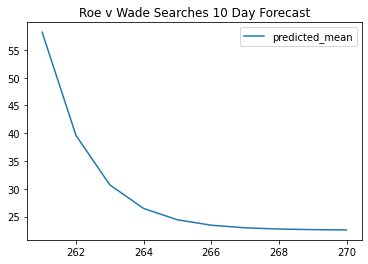

In [141]:
#plot the forecasted return for the next 10 days
mean_absolute_percentage_error(test.Sales, test.ARIMA)
results_RvW_df = pd.DataFrame(results_RvW_df.forecast(steps=10))
results_RvW_df.head()
results_RvW_df.plot(title = 'Roe v Wade Searches 10 Day Forecast')

### d. Explain the results.

Both the autocorrelation and partial autocorrelation plots show gradually decaying values, indicating that ARMA/ARIMA will work for analyzing this dataset. I ran a few different order parameters for the ARIMA model, and found that order=(1,1,2) gave me the lowest AIC {order=(1,1,1) and order=(1,1,3) both gave higher numbers than 2170} because the AIC estimates the amount of data lost. This order parameter also gave me the lowest relative BIC, which is good because as the BIC gets higher, the more penalties the model is incurring for the amount of parameters it's using.

Honestly, I'm not sure how to read the "Roe v Wade Searches 10 Day Forecast" plot, other than to say that it predicts that the number of searches will drop off steeply over the next week or two. This reading seems consistent with the shape of the original data, in which there is no predictable interval between spikes in interest in Roe v. Wade (as measured by the number of searches on the topic), and in which that interest does not seem to be sustained for long periods of time as it rises and falls.

### e. Discuss your findings with your group and explain what trend someone else chose and why they chose the model they did.

I initially chose the Spotify Wrapped trend, but when I got it into a dataframe, it just didn't have a lot of data features of interest -- just spikes every year in the month of Decemeber -- and the numbers were fairly stagnant otherwise. So, I didn't have a chance to discuss more than that with the group, but I remember that someone else had chosen a trend that seemed cyclical, and she was thinking that she'd choose SARIMA to access/assess the seasonality features of the data.

## 2. What is a Fourier transform? Perform one on y=np.cos(x/2), show both (with code), and explain the key elements.

A Fourier transform maps out how often each of the values in a time series occurred during that series. Using FFT makes the transform simpler and quicker to perform.

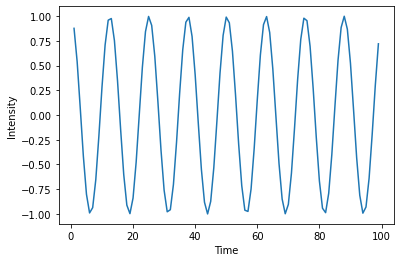

In [59]:
from scipy import signal

x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()


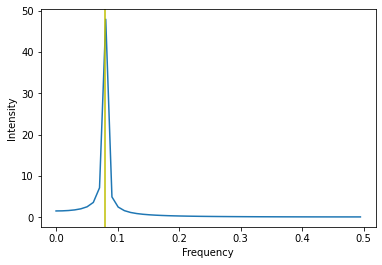

In [154]:
#power spectral density
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
#amplitude
plt.axvline(1/(4*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()

### Explanation of key elements:

The cos(x/2) function generates a graph of a two-hertz sine wave that lasts 100 units of time (unspecified, but probably measured in seconds?).

In the power spectrum density plot, there is a spike at ~0.083, which is where the amplitude line intersects that plot. The height of the spike is almost 50 and represents the power of each frequency component. The location of the spike and amplitude line at 0.083 represents the phase shift (movement along the x-axis) from 0 to 1/(4*π), or approximately 1/12.